# Problem Description / First Look to the Data / Cleaning / EDA

## Store Sales Forecasting of Walmart

To make their businesses more efficient, companies have short-term and long-term plans. Predicting future sales is one of the most crutial plans for a company. Sales forecasting gives idea to the company for arranging stocks, calculating revenue and deciding to make new investment. When demand increases, company needs more goods in stock. So, they need to plan their supply to meet the increased demand . Also, sales affect financial plans of the company. With an accurate forecasting, company can arrange budget and decide to make new investment/close stores or to change price policy. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. 

Walmart also began [recruiting competition on Kaggle](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview) to predict store sales with using historical markdown data. In this competition, job-seekers were provided with historical sales data for 45 Walmart stores (with many departments) located in different areas. Also, holidays and holiday markdown events were added to data because they affect sales, clearly. 

My aim in this project is to build a model which predicts sales of the stores. And, to determine which departments are affected by holiday markdowns more. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.

## Aim of This Notebook

Aim of this notebook is data understanding, preparation and exploration. In this notebook, I will download data, merge different datasets and try to understand the columns interactions with each other and target with the help of visualizations. I will also discover which columns need to clean. Then, I will prepare my data to modeling. 

At the end of the notebook, all explorations, which are obtained by the first look of the data, can be found as a list.

## Data Source

The data is obtained from [Kaggle](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data). It was collected for 45 Walmart stores, from 2010 to 2012. There are 5 different data set for train, test, submission format, features and store. To build a predictive model, I used 3 datasets. Train set contains store sales department-based. Store set contains type and size of stores. Features set contains the consumer price index, unemployment rate, markdowns, fuel price and temperature columns as daily.

After merging all features, we will have 421570 rows and 16 columns for analysis. 

## Importing Necessary Libraries and Data

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns

In [2]:
pd.options.display.max_columns=100 # to see columns 

In [3]:
df_store = pd.read_csv('Raw Data/stores.csv') #store data

In [4]:
df_train = pd.read_csv('Raw Data/train.csv') # train set

In [5]:
df_features = pd.read_csv('Raw Data/features.csv') #external information

# First Look to Data and Merging Three Dataframes

In [6]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [89]:
# merging 3 different sets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.head(50)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
5,1,6,2010-02-05,5749.03,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
6,1,7,2010-02-05,21084.08,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
7,1,8,2010-02-05,40129.01,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
8,1,9,2010-02-05,16930.99,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
9,1,10,2010-02-05,30721.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [10]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column

In [11]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

In [12]:
df.head() # last ready data set

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [92]:
df["Date"] = pd.to_datetime(df["Date"])

In [93]:
df.set_index('Date', inplace=True)

In [15]:
df_weekly_total = df.groupby('Date')['Weekly_Sales'].sum()

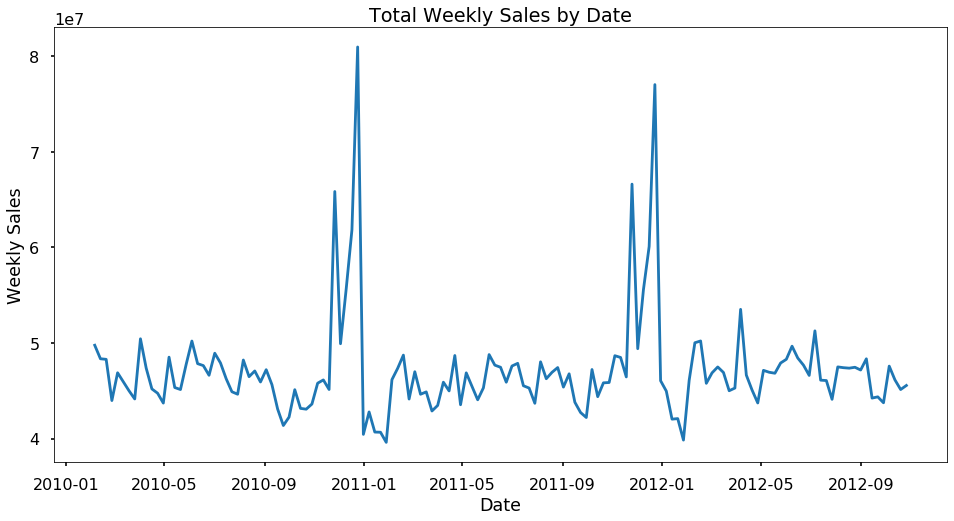

In [26]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(16, 8))
plt.plot(df_weekly_total)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title("Total Weekly Sales by Date")
plt.show()

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Weekly_Sales    421570 non-null float64
IsHoliday_x     421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
IsHoliday_y     421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(2), float64(10), int64(3), object(1)
memory usage: 49.0+ MB


In [90]:
df=df.resample('MS').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [31]:
total_sales_mean=df_weekly_total.rolling(window=3).mean()
total_sales_std=df_weekly_total.rolling(window=3).std()

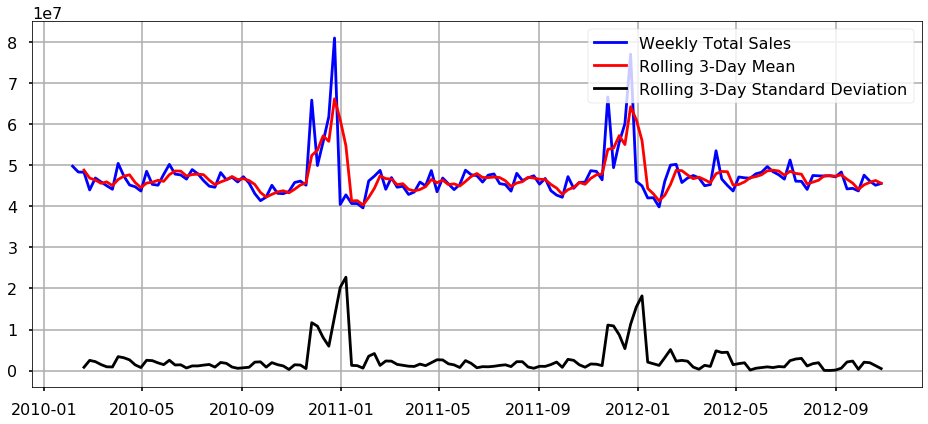

In [81]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_weekly_total, color='blue',label='Weekly Total Sales')
ax.plot(total_sales_mean, color='red', label='Rolling 3-Day Mean')
ax.plot(total_sales_std, color='black', label='Rolling 3-Day Standard Deviation')
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

In [ ]:
plt.figure()
plt.scatter(df_weekly_total[column] , df_weekly_total['weeklySales'])
plt.ylabel('weeklySales')
plt.xlabel(column)


In [41]:
df.reset_index(inplace=True)

In [85]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [86]:
df.loc[df['Weekly_Sales'] <= 0]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-19,1,47,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
2010-03-12,1,47,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2010-10-08,1,47,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
2011-01-21,1,54,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
2011-03-11,1,47,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-05-25,45,49,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
2012-06-29,45,49,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
2012-08-03,45,49,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221


In [50]:
df_types = df[['Type','Weekly_Sales','Date']].copy()

In [51]:
df_types.columns

Index(['Type', 'Weekly_Sales', 'Date'], dtype='object')

In [87]:
df_type

Date        Type
2010-02-05  A       32144126.25
            B       14775498.62
            C        2831115.63
2010-02-12  A       30982570.79
            B       14439178.59
                       ...     
2012-10-19  B       13363404.25
            C        2907405.83
2012-10-26  A       29128295.31
            B       13560940.97
            C        2854880.01
Name: Weekly_Sales, Length: 429, dtype: float64

In [53]:
df_types.set_index('Date', inplace=True)

In [64]:
df_types.reset_index(inplace=True)

In [72]:
df_type =df_types.groupby(['Date','Type'])['Weekly_Sales'].sum()

In [76]:
df_t =df_type.to_frame()

In [80]:
df_t

Weekly_Sales
Date       Type              
2010-02-05 A      32144126.25
           B      14775498.62
           C       2831115.63
2010-02-12 A      30982570.79
           B      14439178.59
...                       ...
2012-10-19 B      13363404.25
           C       2907405.83
2012-10-26 A      29128295.31
           B      13560940.97
           C       2854880.01

[429 rows x 1 columns]

In [103]:
df_new=df_train.copy()

In [104]:
df_new

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [105]:
df_new["Date"] = pd.to_datetime(df_new["Date"])

In [106]:
df_new.set_index('Date', inplace=True)

In [107]:
def expand_df(df):
    data = df.copy()
    data['day'] = data.index.day
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['dayofweek'] = data.index.dayofweek
    return data

data = expand_df(df_new)
display(data)

grand_avg = data.Weekly_Sales.mean()
print(f"The grand average of sales in this dataset is {grand_avg:.4f}")


,Store,Dept,Weekly_Sales,IsHoliday,day,month,year,dayofweek
Date,,,,,,,,
2010-02-05,1,1,24924.50,False,5,2,2010,4
2010-02-12,1,1,46039.49,True,12,2,2010,4
2010-02-19,1,1,41595.55,False,19,2,2010,4
2010-02-26,1,1,19403.54,False,26,2,2010,4
2010-03-05,1,1,21827.90,False,5,3,2010,4
...,...,...,...,...,...,...,...,...
2012-09-28,45,98,508.37,False,28,9,2012,4
2012-10-05,45,98,628.10,False,5,10,2012,4
2012-10-12,45,98,1061.02,False,12,10,2012,4


The grand average of sales in this dataset is 15981.2581


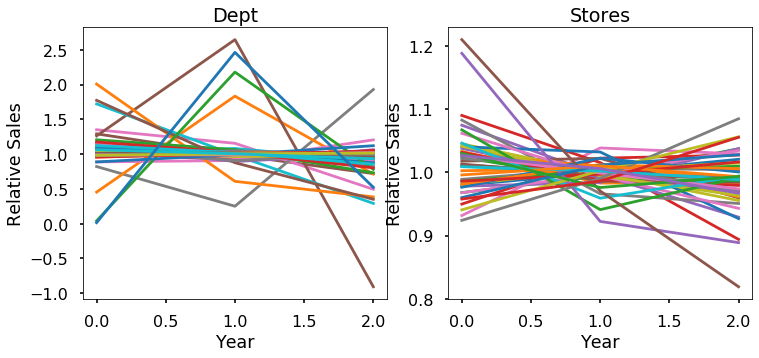

In [111]:
agg_year_item = pd.pivot_table(data, index='year', columns='Dept',
                               values='Weekly_Sales', aggfunc=np.mean).values
agg_year_store = pd.pivot_table(data, index='year', columns='Store',
                                values='Weekly_Sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_year_item / agg_year_item.mean(0)[np.newaxis])
plt.title("Dept")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_year_store / agg_year_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.show()

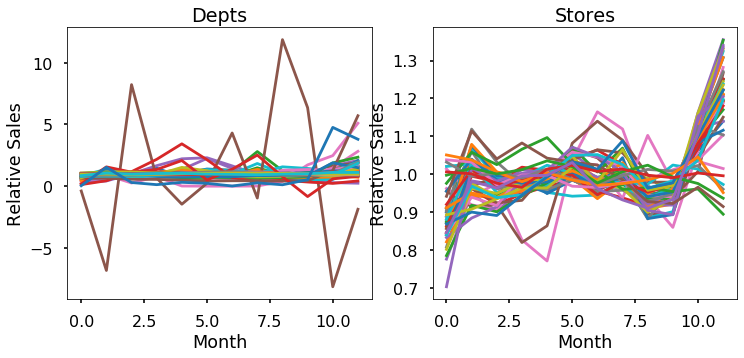

In [112]:
agg_month_item = pd.pivot_table(data, index='month', columns='Dept',
                                values='Weekly_Sales', aggfunc=np.mean).values
agg_month_store = pd.pivot_table(data, index='month', columns='Store',
                                 values='Weekly_Sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_month_item / agg_month_item.mean(0)[np.newaxis])
plt.title("Depts")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_month_store / agg_month_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.show()

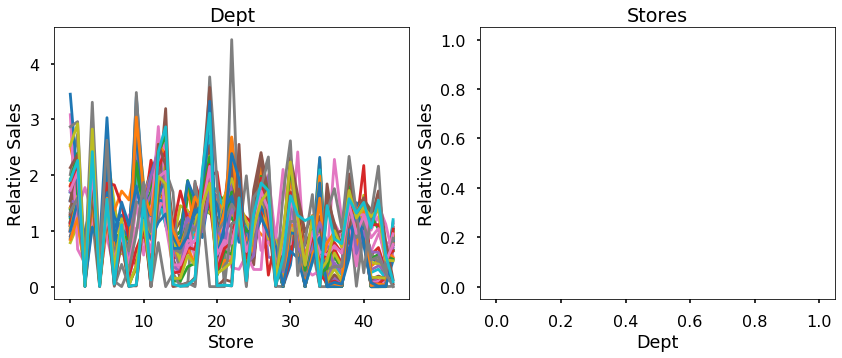

In [116]:
agg_store_item = pd.pivot_table(data, index='Store', columns='Dept',values='Weekly_Sales', aggfunc=np.mean).values

plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(agg_store_item / agg_store_item.mean(0)[np.newaxis])
plt.title("Dept")
plt.xlabel("Store")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_store_item.T / agg_store_item.T.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Dept")
plt.ylabel("Relative Sales")
plt.show()

In [127]:
data

,Store,Dept,Weekly_Sales,IsHoliday,day,month,year,dayofweek
Date,,,,,,,,
2010-02-05,1,1,24924.50,False,5,2,2010,4
2010-02-12,1,1,46039.49,True,12,2,2010,4
2010-02-19,1,1,41595.55,False,19,2,2010,4
2010-02-26,1,1,19403.54,False,26,2,2010,4
2010-03-05,1,1,21827.90,False,5,3,2010,4
...,...,...,...,...,...,...,...,...
2012-09-28,45,98,508.37,False,28,9,2012,4
2012-10-05,45,98,628.10,False,5,10,2012,4
2012-10-12,45,98,1061.02,False,12,10,2012,4


In [126]:
store_item_table = pd.pivot_table(data, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_item_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8